In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
selected_columns = [
    'bant_submit', 'customer_country', 'business_unit', 'com_reg_ver_win_rate',
    'customer_idx', 'customer_type', 'enterprise', 'historical_existing_cnt',
    'id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver', 'customer_job',
    'lead_desc_length', 'inquiry_type', 'product_category', 'product_subcategory',
    'product_modelname', 'customer_country.1', 'customer_position',
    'response_corporate', 'expected_timeline', 'ver_cus', 'ver_pro',
    'ver_win_rate_x', 'ver_win_ratio_per_bu', 'business_area', 'business_subarea',
    'lead_owner'
]

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_file_path = '/content/drive/MyDrive/LGdata/train.csv'

df = pd.read_csv(train_file_path)

In [5]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

0.0 별 is_converted 비율: 8.12%, 전체 갯수: 56286, is_converted된 갯수: 4572
1.0 별 is_converted 비율: 9.23%, 전체 갯수: 3013, is_converted된 갯수: 278


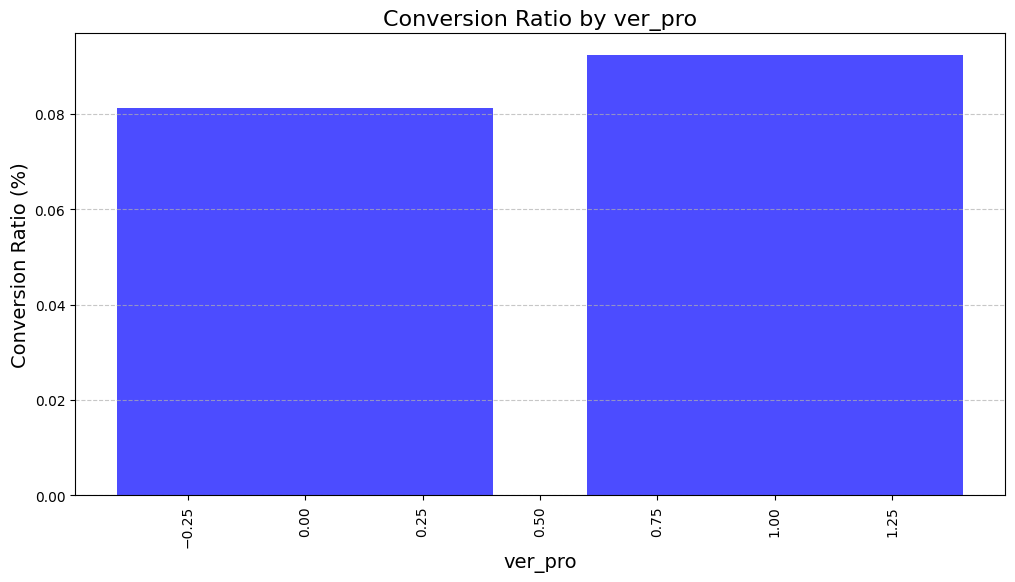

In [52]:
df_ver_pro = df.dropna(subset=['ver_pro'])

converted_counts_ver_pro = df_ver_pro.groupby('ver_pro')['is_converted'].sum().reset_index()
total_counts_ver_pro = df_ver_pro.groupby('ver_pro')['is_converted'].count().reset_index()

ratio_df_ver_pro = pd.merge(converted_counts_ver_pro, total_counts_ver_pro, on='ver_pro', how='left')
ratio_df_ver_pro['conversion_ratio'] = ratio_df_ver_pro['is_converted_x'] / ratio_df_ver_pro['is_converted_y']

for index, row in ratio_df_ver_pro.iterrows():
    total = int(row['is_converted_y'])
    converted = int(row['is_converted_x'])
    ratio = row['conversion_ratio'] * 100
    print(f"{row['ver_pro']} 별 is_converted 비율: {ratio:.2f}%, 전체 갯수: {total}, is_converted된 갯수: {converted}")

plt.figure(figsize=(12, 6))
plt.bar(ratio_df_ver_pro['ver_pro'], ratio_df_ver_pro['conversion_ratio'], color='blue', alpha=0.7)
plt.title('Conversion Ratio by ver_pro', fontsize=16)
plt.xlabel('ver_pro', fontsize=14)
plt.ylabel('Conversion Ratio (%)', fontsize=14)
plt.xticks(rotation='vertical')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
